In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
# DATA PREPROCESSING

df = pd.read_csv('breast-cancer.csv')
df = df.drop(columns=['id'])
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

y = df['diagnosis']  
X = df.drop(columns=['diagnosis'])  

# Remove nulls and duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Remove outliers using the IQR method
column_names = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

for column_name in column_names:
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1
  df = df[~((df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR)))]

# Standardization
scaler = StandardScaler()
df[column_names] = scaler.fit_transform(df[column_names])

# Normalization
normalizer = MinMaxScaler()
df[column_names] = normalizer.fit_transform(df[column_names])
print(df.head)

<bound method NDFrame.head of      diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
10           1     0.764139      0.667818        0.763974   0.682629   
13           1     0.749768      0.702863        0.776942   0.666875   
16           1     0.650858      0.514314        0.660744   0.564424   
19           0     0.554485      0.229516        0.566334   0.441106   
20           0     0.515597      0.296150        0.542601   0.392801   
..         ...          ...           ...             ...        ...   
558          0     0.643250      0.640178        0.682142   0.535837   
559          0     0.382873      0.701876        0.398522   0.271257   
560          0     0.597599      0.860809        0.617170   0.476682   
561          0     0.356666      0.970385        0.348593   0.252999   
566          1     0.813171      0.906713        0.836597   0.745540   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
10          0.293588      

In [3]:
# FEATURE LEARNING

# Calculate correlation with the target variable
correlation_matrix = X.corrwith(y)
selected_features = correlation_matrix[correlation_matrix.abs() > 0.5].index.tolist()
X_selected = X[selected_features]
print("Selected Features:", selected_features)

Selected Features: ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']


In [4]:
# MODEL TRAINING
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.2, random_state=42)
svm = SVC(kernel='rbf', random_state=42)

# Cross validation (5-fold)
cv_scores = cross_val_score(svm, X_train, y_train, cv=5)
print("Cross-validation scores: ", cv_scores)
print("Average cross validation score: ", np.mean(cv_scores))

# Train (fit) SVM model on training data
svm.fit(X_train, y_train)

# Predictions
y_pred_train = svm.predict(X_train)

Cross-validation scores:  [0.92307692 0.87912088 0.96703297 0.86813187 0.87912088]
Average cross validation score:  0.9032967032967033


In [6]:
# MODEL TESTING
y_pred_test = svm.predict(X_test)

Training Accuracy: 0.9121
Testing Accuracy: 0.9474


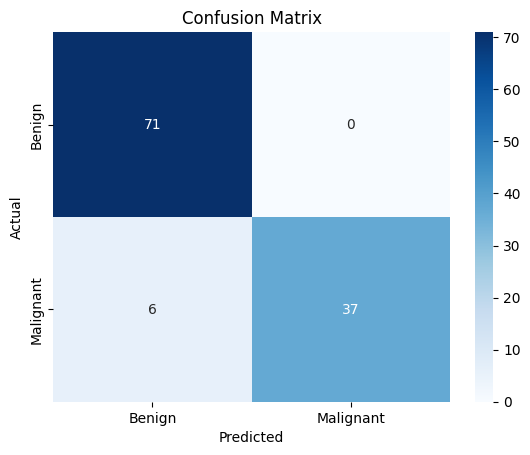

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.93        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [7]:
# MODEL PERFORMANCE EVALUATION
# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report: \n", classification_report(y_test, y_pred_test))

In [8]:
# USER INPUT FOR PREDICTION
user_file = input('Enter a CSV file: ')
user_input_df = pd.read_csv(user_file)
user_input_df = user_input_df.drop(columns=['id']) 
X_user_input = user_input_df[selected_features] 

# Remove nulls and duplicates
user_input_df.dropna(inplace=True)
user_input_df.drop_duplicates(inplace=True)

# Remove outliers using the IQR method
column_names = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

# Standardization
scaler = StandardScaler()
user_input_df[column_names] = scaler.fit_transform(user_input_df[column_names])

# Normalization
normalizer = MinMaxScaler()
user_input_df[column_names] = normalizer.fit_transform(user_input_df[column_names])

# Make a prediction
prediction = svm.predict(X_user_input)

# Display the prediction
if prediction[0] == 1:
    print("The model predicts the tumor is Malignant.")
else:
    print("The model predicts the tumor is Benign.")

The model predicts the tumor is Malignant.
